In [20]:
import pandas as pd
from pymongo import MongoClient
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DayLocator, DateFormatter

In [2]:
date_range = pd.date_range('2016-11-21', datetime.now(), period='1D')
client = MongoClient('mongodb://localhost:27017/')
db = client.articles

In [3]:

article_counts = []
for date in date_range:
    num_articles = db.articles.find({'date': {'$lt': date}}).count()
    article_counts.append((date, num_articles))
    
print(article_counts)

[(Timestamp('2016-11-21 00:00:00', freq='D'), 1824), (Timestamp('2016-11-22 00:00:00', freq='D'), 2858), (Timestamp('2016-11-23 00:00:00', freq='D'), 3982), (Timestamp('2016-11-24 00:00:00', freq='D'), 5039), (Timestamp('2016-11-25 00:00:00', freq='D'), 5487), (Timestamp('2016-11-26 00:00:00', freq='D'), 5852), (Timestamp('2016-11-27 00:00:00', freq='D'), 6128), (Timestamp('2016-11-28 00:00:00', freq='D'), 6445), (Timestamp('2016-11-29 00:00:00', freq='D'), 6957), (Timestamp('2016-11-30 00:00:00', freq='D'), 7894), (Timestamp('2016-12-01 00:00:00', freq='D'), 8998), (Timestamp('2016-12-02 00:00:00', freq='D'), 10034), (Timestamp('2016-12-03 00:00:00', freq='D'), 10941), (Timestamp('2016-12-04 00:00:00', freq='D'), 11577), (Timestamp('2016-12-05 00:00:00', freq='D'), 12070), (Timestamp('2016-12-06 00:00:00', freq='D'), 13044), (Timestamp('2016-12-07 00:00:00', freq='D'), 14007), (Timestamp('2016-12-08 00:00:00', freq='D'), 14898), (Timestamp('2016-12-09 00:00:00', freq='D'), 15630), (Ti

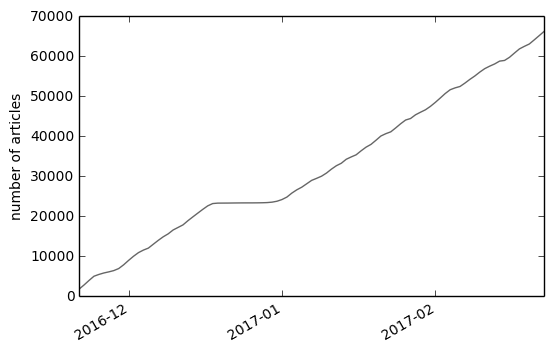

In [30]:
%matplotlib inline

dates = [x for x,y in article_counts]
counts = [y for x,y in article_counts]

fig, ax = plt.subplots()
ax.plot_date(dates, counts, 'g', color = '0.4')

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

ax.fmt_xdata = DateFormatter('%Y-%m')
fig.autofmt_xdate()
#ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

#plot = plt.plot(article_counts)
plt.ylabel('number of articles')
plt.savefig('corpus_size.pdf', format='pdf')
plt.show()